In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.drop(["Unnamed: 32", "id"], inplace = True, axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


B    357
M    212
Name: diagnosis, dtype: int64


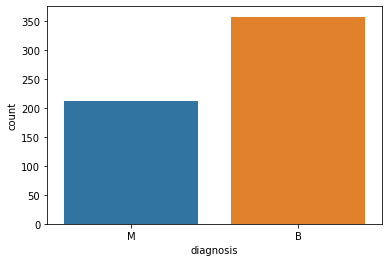

In [4]:
sns.countplot(data["diagnosis"])
print(data.diagnosis.value_counts())

In [5]:
data["diagnosis"] = [1 if i.strip() == "M" else 0 for i in data.diagnosis]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


<function matplotlib.pyplot.show(close=None, block=None)>

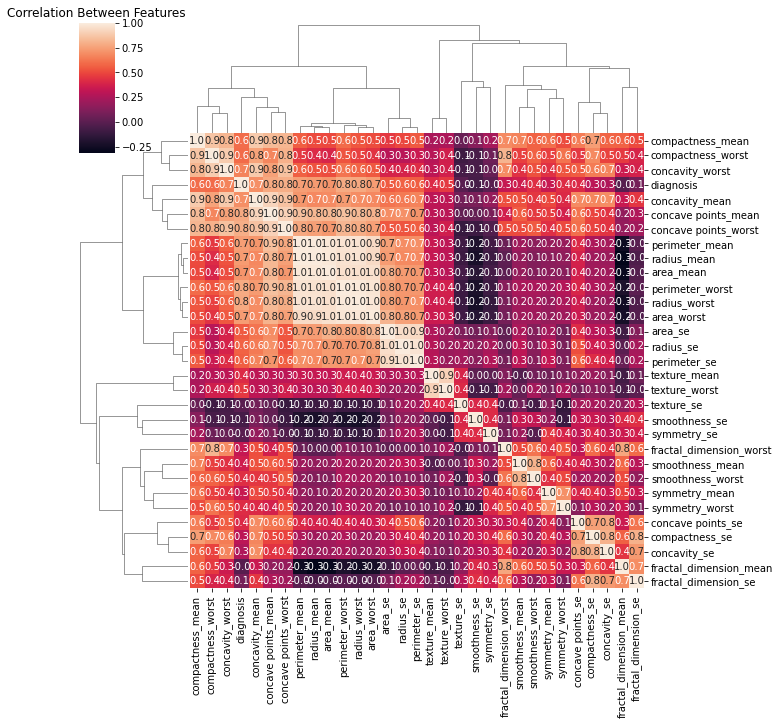

In [8]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".1f")
plt.title("Correlation Between Features")
plt.show

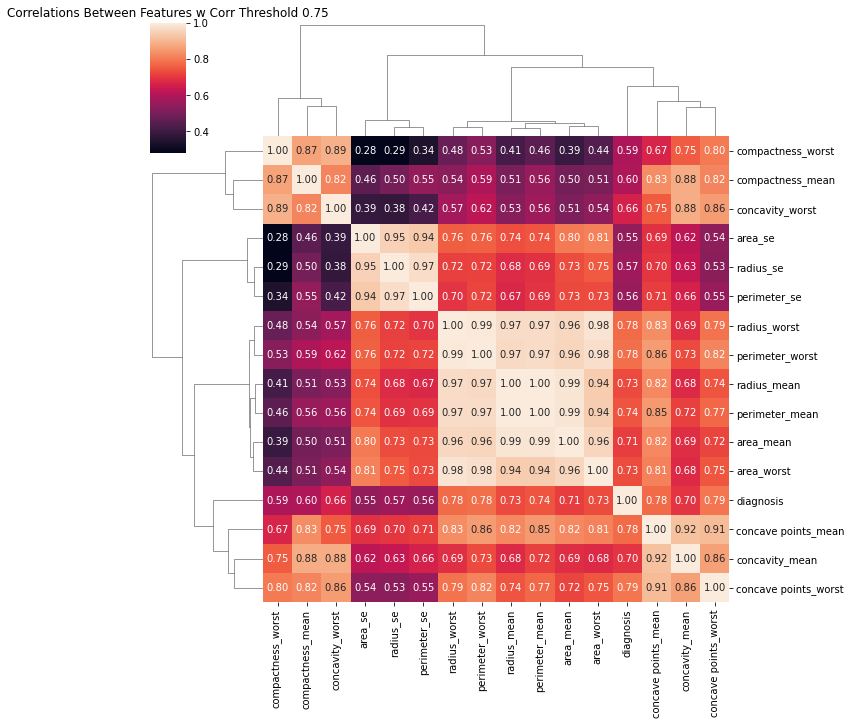

In [9]:
threshold = 0.50
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlations Between Features w Corr Threshold 0.75")
plt.show()

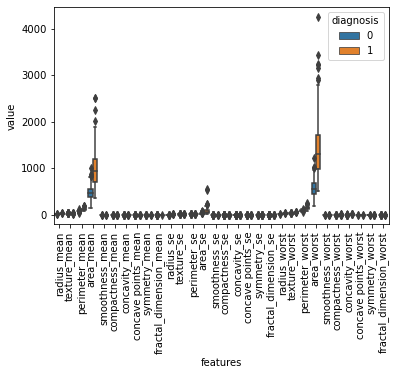

In [10]:
data_melted = pd.melt(data, id_vars = "diagnosis",
                     var_name = "features",
                     value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

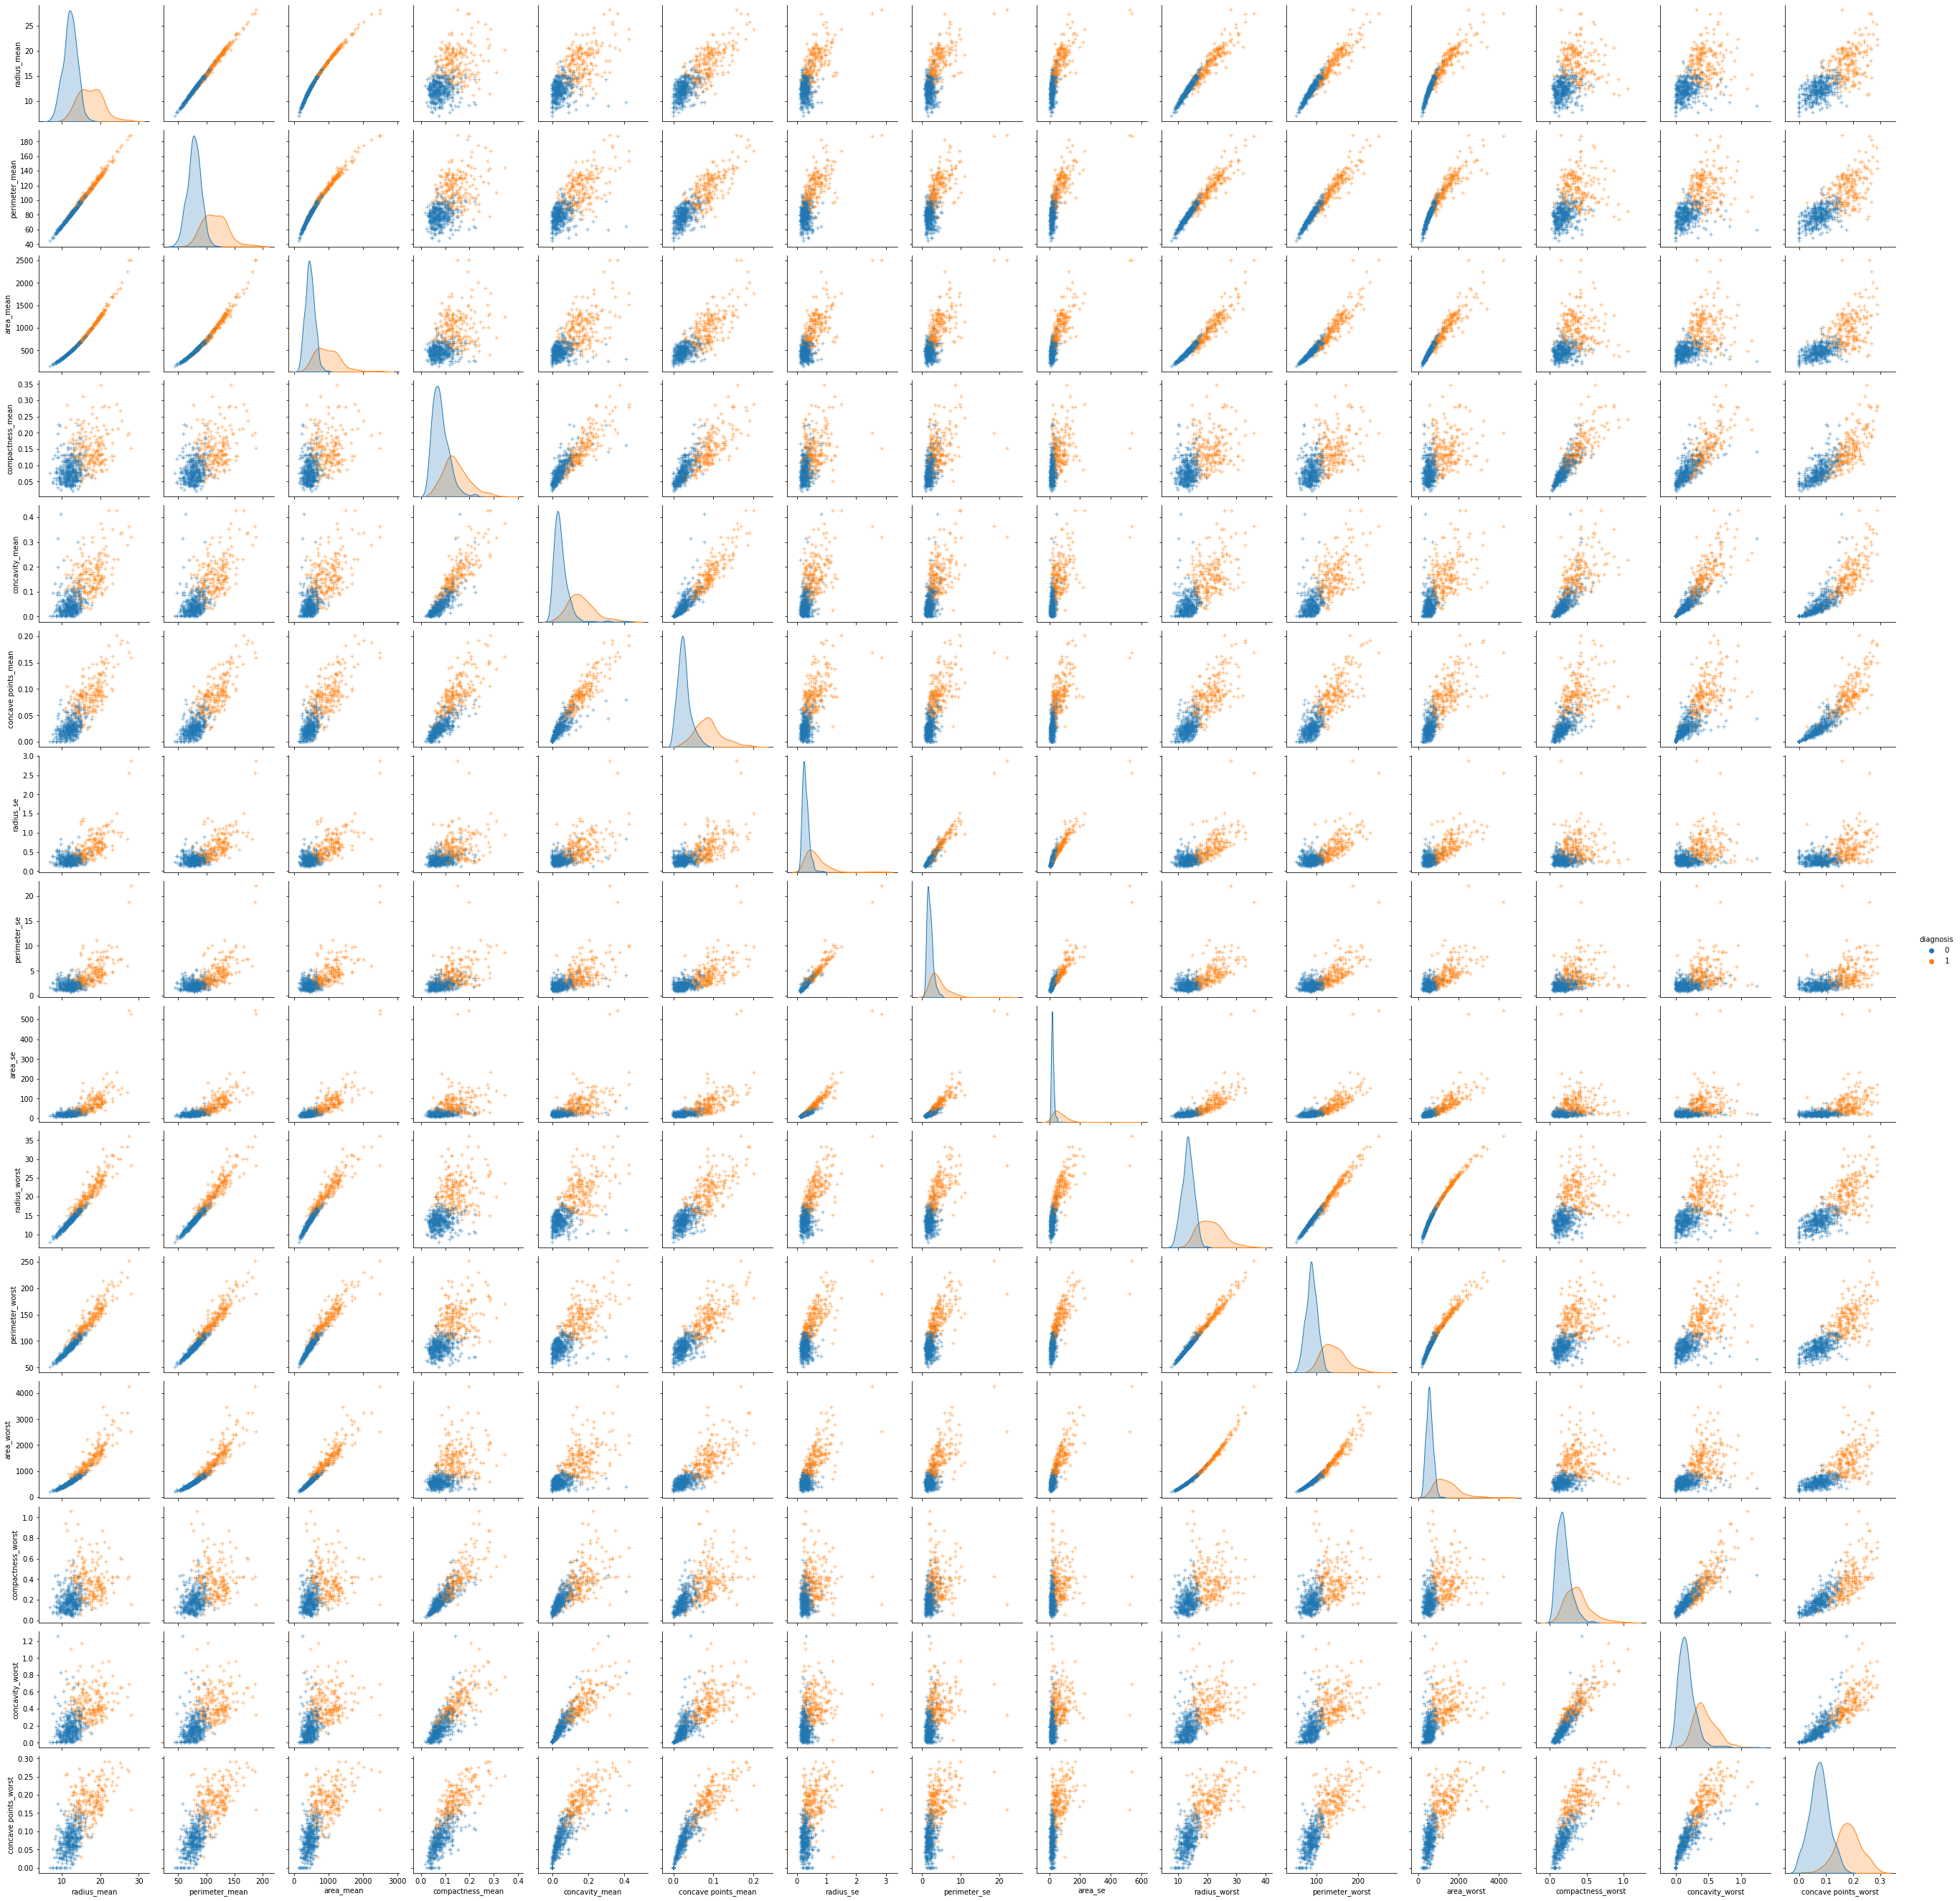

In [11]:
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis")
plt.show()

## Density based Outlier Detection System

Bir noktanın local density en yakın k tane komşusunun local density'si ile karşılaştırılır.

$K = 2$ 

$s = \{A, B, C, D\} $

$LOF_A > 1, outlier,$

$LOF_A < 1, not inlier$

$LOF_A = \frac{LRD_B + LRD_D}{LRD_A}\frac{1}{2}$

$LRD = \frac{1}{ARD}$

$ARD: Avarage Reachability Distance$

$ARD = \frac{RD }{K}$

$RD: Reachability Distance$

$RD_A = \sum_{k=1}^{B,D}max(K*dist of k dist(A,k))$

In [12]:
y = data.diagnosis
x =data.drop(["diagnosis"], axis = 1)
columns = x.columns.tolist()

In [13]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)

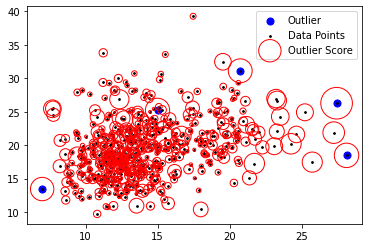

In [14]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

threshold = -2
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index, 1], color = "blue", s = 50, label = "Outlier")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color ="k", s = 3, label = "Data Points")

radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors= "r", facecolors = "none", label = "Outlier Score")
plt.legend()
plt.show()

In [15]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train_df = pd.DataFrame(x_train, columns = columns)
x_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,394.0,-6.148494e-16,1.001271,-1.836963,-0.687820,-0.234497,0.489230,3.799864
texture_mean,394.0,7.583471e-16,1.001271,-2.230550,-0.706432,-0.084620,0.567308,4.754055
perimeter_mean,394.0,5.252426e-16,1.001271,-1.831181,-0.685963,-0.246204,0.516646,3.787350
area_mean,394.0,2.076737e-16,1.001271,-1.385244,-0.669570,-0.313097,0.395647,4.722942
smoothness_mean,394.0,-8.483062e-16,1.001271,-2.225659,-0.720389,-0.027515,0.603417,4.691567
compactness_mean,394.0,1.831586e-18,1.001271,-1.550299,-0.805549,-0.238274,0.525183,3.449393
concavity_mean,394.0,7.889910e-17,1.001271,-1.119268,-0.761767,-0.346171,0.557358,4.212954
concave points_mean,394.0,7.100919e-17,1.001271,-1.257509,-0.748818,-0.389030,0.715342,3.916845
symmetry_mean,394.0,1.961206e-16,1.001271,-2.336629,-0.703365,-0.031810,0.545763,4.499358
fractal_dimension_mean,394.0,2.846003e-17,1.001271,-1.833710,-0.726331,-0.166498,0.463181,4.832329


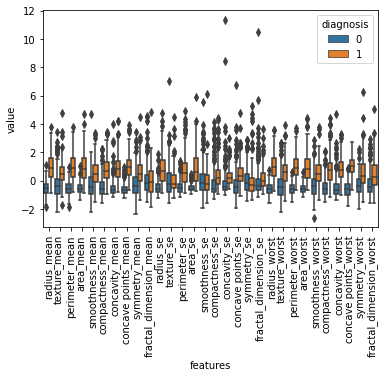

In [20]:
x_train_df["diagnosis"] = y_train
data_melted = pd.melt(x_train_df,
                       id_vars = "diagnosis",
                       var_name = "features",
                       value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

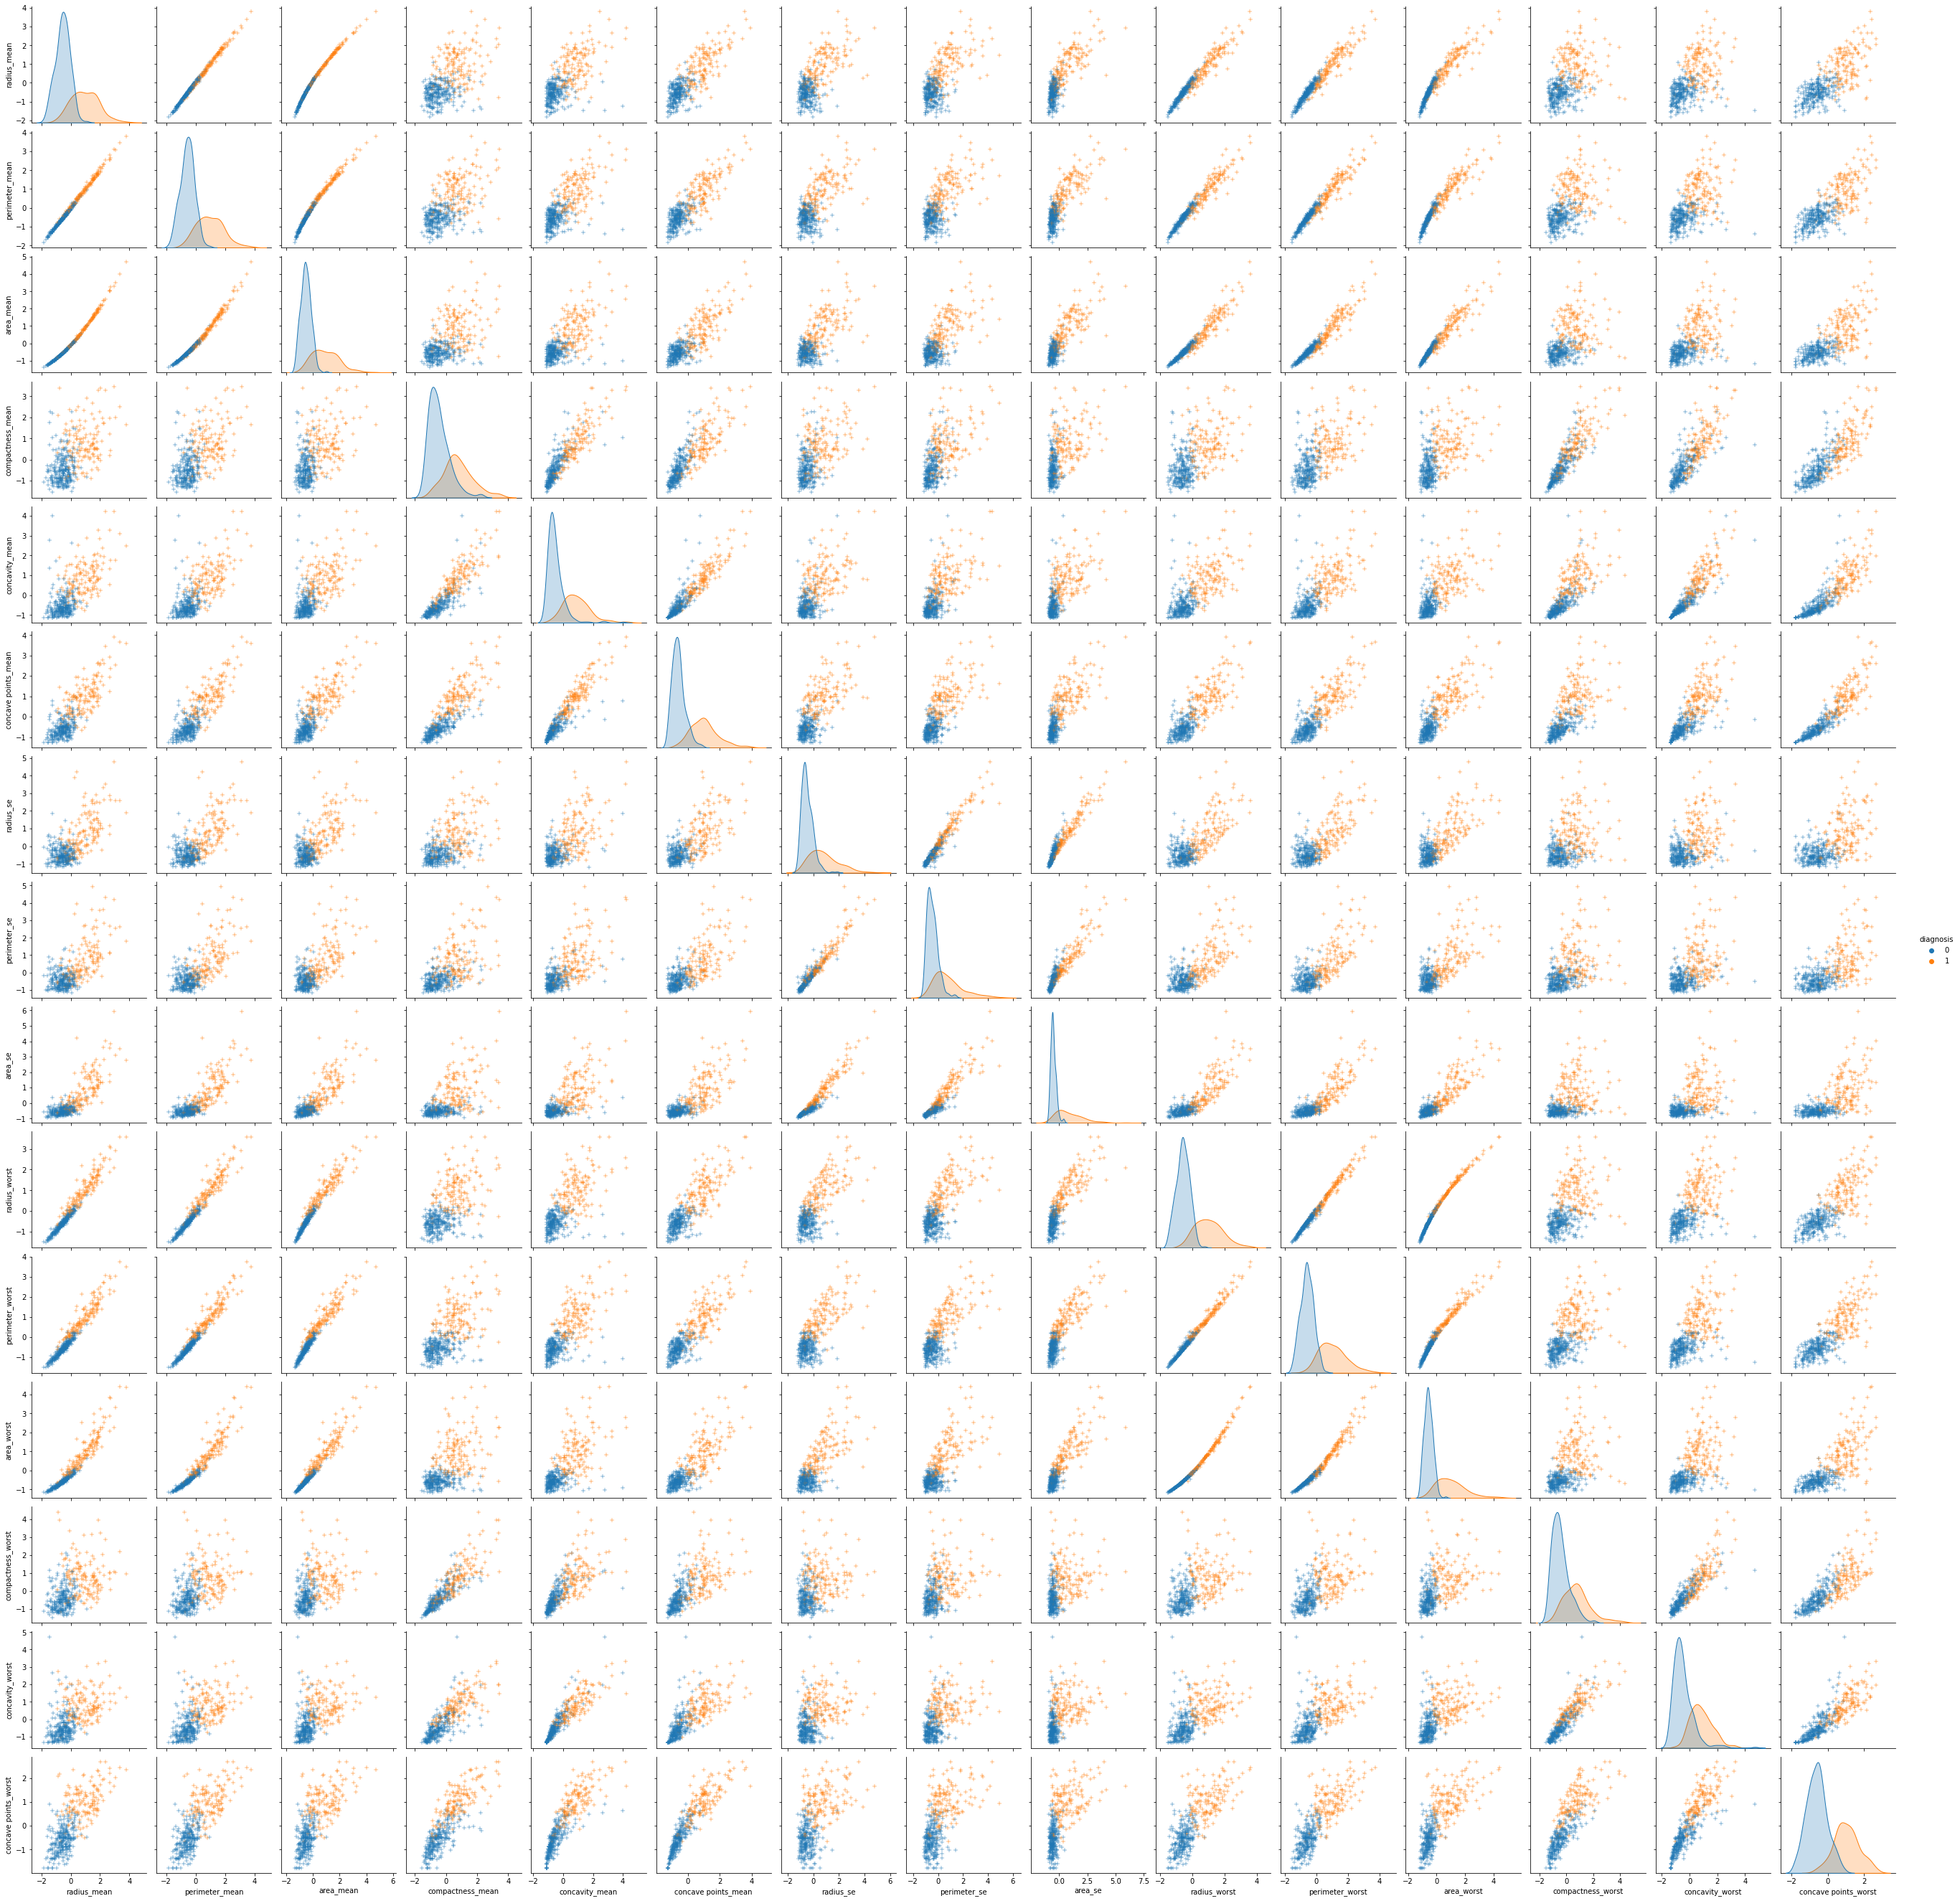

In [21]:
sns.pairplot(x_train_df[corr_features], diag_kind="kde", markers="+", hue="diagnosis")
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
score = knn.score(x_test, y_test)

In [25]:
print("Score: ", score)
print("CM:\n", cm)
print("Acc: ", acc)

Score:  0.9529411764705882
CM:
 [[107   0]
 [  8  55]]
Acc:  0.9529411764705882


In [44]:
def knn_best_params(x_train, x_test, y_train, y_test):
    k_range = list(range(2,31))
    weight_options = ["uniform", "distance"]
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
   
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score: {} with params {}".format(grid.best_score_, grid.best_params_))
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    print("Test score {}, Train score {}".format(acc_test, acc_train))
    print("CM test:\n",cm_test)
    print("CM train:\n",cm_train)
    
    return grid

In [37]:
grid = knn_best_params(x_train, x_test, y_train, y_test)

Best training score: 0.9692948717948718 with params {'n_neighbors': 4, 'weights': 'distance'}
Test score 0.9470588235294117, Train score 1.0
CM test:
 [[104   3]
 [  6  57]]
CM train:
 [[249   0]
 [  0 145]]


## PCA
eigen vector: new features spaces direction
eigen value: megnetund

$eigen vector: x - x^- = x$
$eigen value: y - y^- = y$\
             _                  _
            | var(x)    cov(x,y) |
cov(x, y) = | cov(y,x)  var(y)   |
            |_                  _|

Text(0.5, 1.0, 'PCA: P1 vs P2')

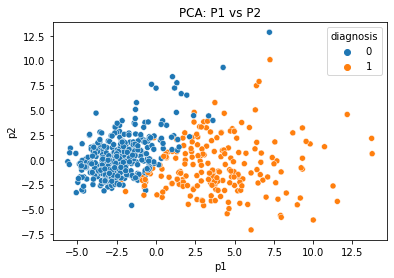

In [38]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2)
pca.fit(x_scaled)
x_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(x_reduced_pca, columns = ["p1", "p2"])
pca_data["diagnosis"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "diagnosis", data = pca_data)
plt.title("PCA: P1 vs P2")

In [39]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced_pca, y, test_size=0.3, random_state=42)

grid_pca = knn_best_params(x_train_pca, x_test_pca, y_train_pca, y_test_pca)

Best training score: 0.9593589743589742 with params {'n_neighbors': 9, 'weights': 'uniform'}
Test score 0.9235294117647059, Train score 0.9593908629441624
CM test:
 [[102   5]
 [  8  55]]
CM train:
 [[243   6]
 [ 10 135]]


## NCA

Text(0.5, 1.0, 'NCA: p1 vs p2')

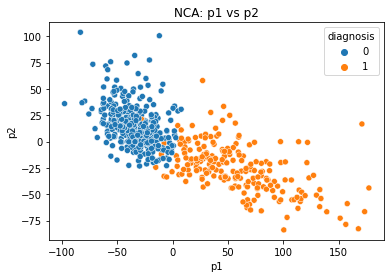

In [45]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state=42)
nca.fit(x_scaled, y)
x_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(x_reduced_nca, columns=["p1","p2"])
nca_data["diagnosis"] = y
sns.scatterplot(x = "p1", y = "p2", hue ="diagnosis", data = nca_data)
plt.title("NCA: p1 vs p2")

In [46]:
x_train_nca, x_test_nca, y_train_nca, y_test_nca = train_test_split(x_reduced_nca, y, test_size=0.3, random_state=42)
grid_nca = knn_best_params(x_train_nca, x_test_nca, y_train_nca, y_test_nca)

Best training score: 0.9949358974358974 with params {'n_neighbors': 7, 'weights': 'distance'}
Test score 0.9705882352941176, Train score 1.0
CM test:
 [[107   0]
 [  5  58]]
CM train:
 [[249   0]
 [  0 145]]
